# Introduction

Name: Dehan Ammaralda Handiana

This notebook intended for explore the data and try to use other model

In [56]:
# linear algebra and calculus
import numpy as np 

# data manupulation and processing library, (e.g. pd.read_csv)
import pandas as pd 

from matplotlib import pyplot as plt

import seaborn as sns

from plotly import express as px

import os

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/content/drive/MyDrive/Telyu_ML_Class'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Table Data configurations setup
pd.set_option('max.column', None) #  show all columns  names

/content/drive/MyDrive/Telyu_ML_Class/Week 1/melb_data.csv


Data inputted. Now, read it into csv

In [12]:
home_data = pd.read_csv('/content/drive/MyDrive/Telyu_ML_Class/Week 1/melb_data.csv')

print(home_data.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [13]:
print(home_data.head())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1   

In [14]:
print(home_data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [15]:
print(home_data.shape)

(13580, 21)


In [16]:
target = 'Price'
y = home_data[target]
y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [17]:
print(home_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

As we can see in the output.



*   There are 13580 entries
*   There are total 21 features (0 to 20)
*   There are three types of datatype dtypes: float64(12), int64(1), object(8)
*   It's Memory usage that is, memory usage: 2.2+ MB
*   Also, We can check how many missing values available in the Non-Null Count column








In [45]:
# Separate columns between numerical and object

categorical_features = home_data.select_dtypes('object').columns

categorical_features, len(categorical_features)

        


(Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
        'Regionname'],
       dtype='object'), 8)

In [44]:

numeric_features = home_data.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)

(Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount'],
       dtype='object'), 13)

In [21]:
# Find columns that have missing value in home_data
home_data.isna().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [ ]:
# Duplicate value in home_data (train)

duplicates = home_data.duplicated().sum()
print('Duplicates in train data: {0}'.format(duplicates))

Duplicates in train data: 0


In [25]:
(home_data.isna().sum() * 100 / home_data.isna().count()).sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
Landsize          0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

In [27]:
home_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe(include='all')

,BuildingArea,YearBuilt,CouncilArea,Car
count,7130.000000,8205.000000,12211,13518.000000
unique,NaN,NaN,33,NaN
top,NaN,NaN,Moreland,NaN
freq,NaN,NaN,1163,NaN
mean,151.967650,1964.684217,NaN,1.610075
std,541.014538,37.273762,NaN,0.962634
min,0.000000,1196.000000,NaN,0.000000
25%,93.000000,1940.000000,NaN,1.000000
50%,126.000000,1970.000000,NaN,2.000000
75%,174.000000,1999.000000,NaN,2.000000


In [29]:
# Let's check how many percentage values are NaN.

home_data.BuildingArea.value_counts(normalize=True, dropna=False) * 100

NaN       47.496318
120.00     0.839470
110.00     0.655376
100.00     0.648012
130.00     0.618557
            ...    
255.79     0.007364
424.00     0.007364
186.36     0.007364
147.20     0.007364
368.00     0.007364
Name: BuildingArea, Length: 603, dtype: float64

In [31]:
# Check the numerical feature's statastical values.

home_data.BuildingArea.describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

For Categorical feature, We fill the highest occorance value. In this case, highest occurrence value is 'Moreland'. so we fill with this values. And other feature are fill with mean(), median(), and mode().

In [32]:
home_data['CouncilArea'] = home_data['CouncilArea'].fillna('Moreland')

In [33]:
home_data['YearBuilt'] = home_data['YearBuilt'].fillna(home_data['YearBuilt'].mode()[0])

In [34]:
home_data['BuildingArea'] = home_data['BuildingArea'].fillna(home_data['BuildingArea'].mean())

In [35]:
home_data['Car'] = home_data['Car'].fillna(home_data['Car'].median())

In [36]:
# Now, is there any missing values are there?
home_data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

In [46]:
print("Total Records :", len(home_data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(home_data[col].unique()))

Total Records : 13580
Total Unique Records of Suburb = 314
Total Unique Records of Address = 13378
Total Unique Records of Type = 3
Total Unique Records of Method = 5
Total Unique Records of SellerG = 268
Total Unique Records of Date = 58
Total Unique Records of CouncilArea = 33
Total Unique Records of Regionname = 8


In [47]:
categorical_features = categorical_features.drop('Address')
categorical_features = categorical_features.drop('SellerG')
categorical_features = categorical_features.drop('Suburb')

In [49]:
# Let's see again the number of unique records

print("Total Records :", len(home_data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(home_data[col].unique()))

Total Records : 13580
Total Unique Records of Type = 3
Total Unique Records of Method = 5
Total Unique Records of Date = 58
Total Unique Records of CouncilArea = 33
Total Unique Records of Regionname = 8


In [51]:
home_data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3920,Maribyrnong,4 Kallara Gr,5,h,930000.0,VB,Nelson,10/09/2016,8.7,3032.0,5.0,2.0,2.0,330.0,151.96765,1970.0,Maribyrnong,-37.7859,144.8898,Western Metropolitan,4918.0
2330,Elwood,3/58 Byron St,1,u,340000.0,SP,Buxton,27/06/2016,7.7,3184.0,1.0,1.0,1.0,0.0,42.00000,1970.0,Port Phillip,-37.8784,144.9864,Southern Metropolitan,8989.0
4490,Northcote,160 Bent St,4,h,1420000.0,S,hockingstuart,28/05/2016,5.5,3070.0,3.0,1.0,1.0,465.0,137.00000,1890.0,Darebin,-37.7662,144.9889,Northern Metropolitan,11364.0
6254,Thornbury,40/337 Station St,1,u,370000.0,VB,Jellis,3/12/2016,6.5,3071.0,1.0,1.0,1.0,0.0,62.00000,1999.0,Darebin,-37.7634,145.0210,Northern Metropolitan,8870.0
5559,South Melbourne,48 Glover St,2,h,1200000.0,VB,Greg,18/06/2016,2.1,3205.0,2.0,2.0,1.0,131.0,79.00000,1890.0,Port Phillip,-37.8390,144.9480,Southern Metropolitan,5943.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


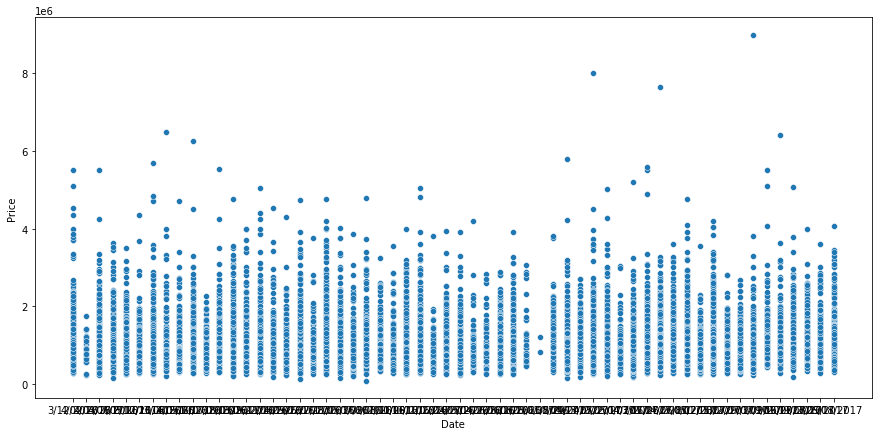

In [57]:
plt.figure(figsize=(15, 7))
sns.scatterplot(home_data.Date, home_data.Price);

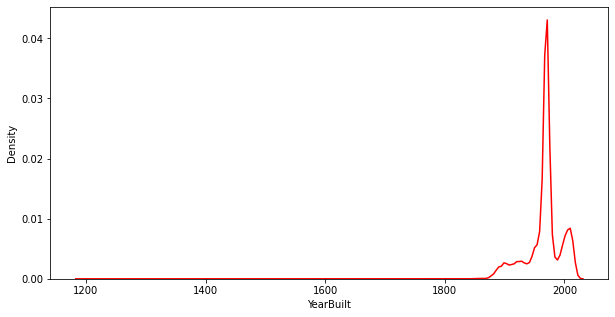

In [59]:
plt.figure(figsize=(10, 5))
sns.kdeplot(home_data.YearBuilt,Label='YearBuilt', color='r');

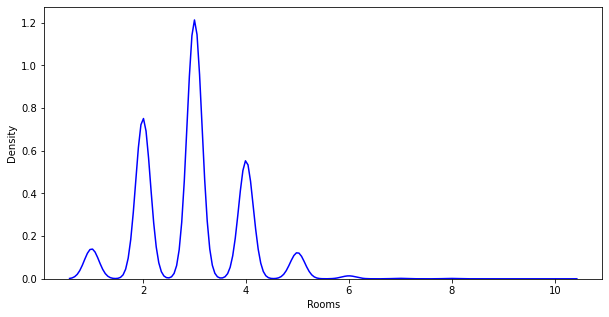

In [60]:
plt.figure(figsize=(10, 5))
sns.kdeplot(home_data.Rooms,Label='Rooms', color='b');

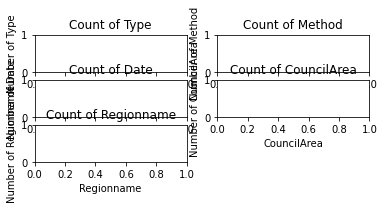

In [62]:
# plt.figure(figsize=(10, 5))

# [ 'Regionname', 'Method', 'Method', 'Type' ]
for idx, column in enumerate(categorical_features):
    
    df = home_data.copy()
    
    unique = df[column].value_counts(); # ascending=True
 
    plt.subplot(len(categorical_features), 2, idx+1)    
    
    fig = px.bar(x=unique.index, y=unique.values)
    fig.show()
    
    plt.title("Count of "+ column)
#     plt.bar(unique.index, unique.values);
    
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)
    
# plt.tight_layout()
plt.show()

In [63]:
fig = px.histogram(home_data, x='Method', y='Price', color='Method');
fig.show()

In [64]:
fig = px.histogram(home_data, x='Rooms', y='Price', color='Rooms');
fig.show()

In [65]:
corr_ = home_data[numeric_features].corr()
corr_

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,0.091373,-0.051562,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,0.069570,-0.259387,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,0.073990,0.194815,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,0.040714,0.025400,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,0.089102,-0.041331,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321014,0.037130,0.084462,0.113957,-0.070594,0.118971,-0.052201
Car,0.406935,0.239109,0.260596,0.050514,0.403867,0.321014,1.000000,0.026780,0.068276,0.078696,-0.002023,0.062929,-0.024344
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026780,1.000000,0.094659,0.008806,0.009695,0.010833,-0.006854
BuildingArea,0.091373,0.069570,0.073990,0.040714,0.089102,0.084462,0.068276,0.094659,1.000000,0.005178,0.031799,-0.017441,-0.020736
YearBuilt,-0.051562,-0.259387,0.194815,0.025400,-0.041331,0.113957,0.078696,0.008806,0.005178,1.000000,0.046718,-0.000515,0.004421


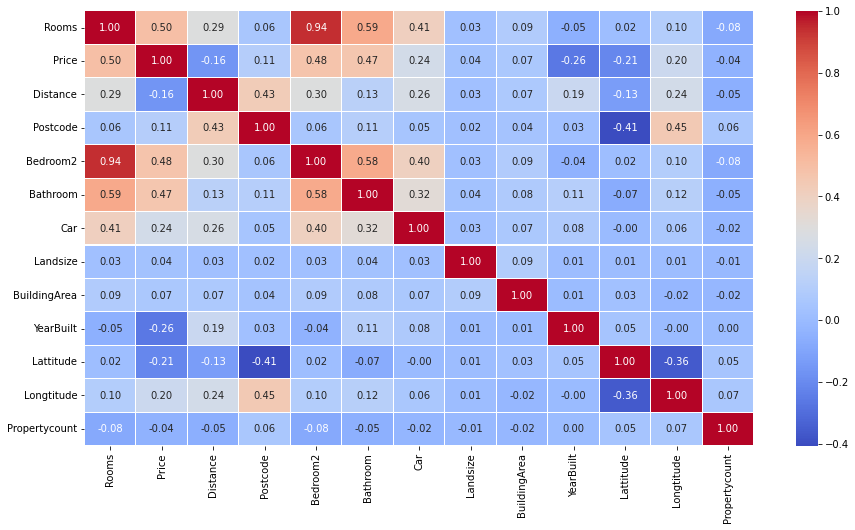

In [66]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

Now need to convert categorical features into numerical by using LabelEncoder

In [67]:
home_data[categorical_features].value_counts()

Type  Method  Date        CouncilArea   Regionname                
h     S       23/09/2017  Moreland      Western Metropolitan          43
              3/09/2017   Moreland      Northern Metropolitan         40
              23/09/2017  Moreland      Northern Metropolitan         39
              16/09/2017  Moreland      Northern Metropolitan         38
              19/08/2017  Moreland      Northern Metropolitan         36
                                                                      ..
      VB      29/07/2017  Frankston     South-Eastern Metropolitan     1
                          Hobsons Bay   Western Metropolitan           1
                          Kingston      South-Eastern Metropolitan     1
                          Knox          Eastern Metropolitan           1
u     VB      8/10/2016   Port Phillip  Southern Metropolitan          1
Length: 5229, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
# Here we need to define feature_columns the we convert to number in the below cell

categorical_features = [ 'Type', 'Method', 'CouncilArea', 'Regionname']
categorical_features

['Type', 'Method', 'CouncilArea', 'Regionname']

In [71]:
# Encoding ...

for column in categorical_features:
    
    l_encoder = LabelEncoder()
    
    home_data[column] = l_encoder.fit_transform(home_data[column])

In [72]:
# training_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                         'YearBuilt', 'Lattitude', 'Longtitude']

training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('Price')

# show the final list
training_features

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Type',
 'Method',
 'CouncilArea',
 'Regionname']

Here, We are using MinMaxScaler to notmalize our dataset. Firstly, we need to import that class from sklearn.preprocessing package

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
# Let's Normalize the data for training and testing

minMaxNorm = MinMaxScaler()

minMaxNorm.fit(home_data[training_features])

MinMaxScaler()

In [77]:
X = minMaxNorm.transform(home_data[training_features]) 
X

array([[0.11111111, 0.05197505, 0.06857728, ..., 0.25      , 0.96875   ,
        0.28571429],
       [0.11111111, 0.05197505, 0.06857728, ..., 0.25      , 0.96875   ,
        0.28571429],
       [0.22222222, 0.05197505, 0.06857728, ..., 0.75      , 0.96875   ,
        0.28571429],
       ...,
       [0.22222222, 0.14137214, 0.01637666, ..., 0.25      , 0.71875   ,
        0.85714286],
       [0.33333333, 0.14137214, 0.01637666, ..., 0.        , 0.71875   ,
        0.85714286],
       [0.33333333, 0.13097713, 0.01330604, ..., 0.75      , 0.71875   ,
        0.85714286]])

In [81]:
Y = home_data['Price']  
Y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

split data into training and validation data, for both features and target. The split is based on a random number generator.
Supplying a numeric value to the random_state argument guarantees we get the same split eve run this script.

In [84]:
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size = 0.3, random_state = 0)

In [86]:
print("Total size: ", home_data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  13580
Train size:  (9506, 16) (9506,)
Test size:  (4074, 16) (4074,)


Before Implementing ML Models we can create dataframe to stores the prediction values by each models that we are implementing below here.

In [87]:
models_summary = pd.DataFrame([],
                              columns=['model_name', 
                                       'prediction_score',
                                       'mean_absolute_error'
                                      ])
models_summary

,model_name,prediction_score,mean_absolute_error


# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error

In [89]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)

LinearRegression()

In [90]:
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted

array([1683205.68187733, 1046159.42248672,  741346.0668771 , ...,
       1010224.15627124, 1111434.08769215, 1089108.27880984])

In [91]:
lr_model_score = lr_model.score(test_X, test_Y )

lr_model_score

0.5645846795970157

In [92]:
mae = mean_absolute_error(test_Y, lr_model_predicted)

In [93]:
models_summary = models_summary.append({
    'model_name': lr_model.__class__.__name__,
    'prediction_score': lr_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

In [94]:
models_summary

,model_name,prediction_score,mean_absolute_error
0,LinearRegression,0.564585,273180.960096


# Decission Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
Dtree_model = DecisionTreeRegressor(random_state=1)

In [97]:
Dtree_model.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=1)

In [98]:
Dtree_model_predicted = Dtree_model.predict(test_X)

In [99]:
Dtree_model_score = Dtree_model.score(test_X, test_Y)
Dtree_model_score

0.5615405114752818

In [100]:
mae = mean_absolute_error(Dtree_model_predicted, test_Y)

In [101]:
models_summary = models_summary.append({
    'model_name': Dtree_model.__class__.__name__,
    'prediction_score': Dtree_model_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)

,model_name,prediction_score,mean_absolute_error
0,LinearRegression,0.564585,273180.960096
1,DecisionTreeRegressor,0.561541,233966.255277


# Random Forest

In [102]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [103]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [104]:
RFRModel.fit(train_X, train_Y)

RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [105]:
RFRModel_predicted = RFRModel.predict(test_X)

In [106]:
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score

0.7351351766561852

In [107]:
mae = mean_absolute_error(RFRModel_predicted, test_Y)

In [108]:
models_summary = models_summary.append({
    'model_name': RFRModel.__class__.__name__,
    'prediction_score': RFRModel_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)

,model_name,prediction_score,mean_absolute_error
2,RandomForestRegressor,0.735135,200429.203316
0,LinearRegression,0.564585,273180.960096
1,DecisionTreeRegressor,0.561541,233966.255277


In [109]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [111]:
rf = RandomForestRegressor()

# Search the best parameter with 100 iteration and 3-fold cross validation to evaluate the result
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1)
# Fit the random search model
rf_random.fit(train_X, train_Y)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time= 1.2min
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  19.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  19.3s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=  19.4s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_e

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

Currently, this is the best parameter that can be use to increase accuracy

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [112]:
RFRModel = RandomForestRegressor(n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 1, 
                                 max_features = 'sqrt', max_depth = 110, bootstrap = False)

In [113]:
RFRModel.fit(train_X, train_Y)

RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      min_samples_split=5, n_estimators=1400)

In [114]:
RFRModel_predicted = RFRModel.predict(test_X)

In [115]:
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score

0.7923671071319669

In [116]:
mae = mean_absolute_error(RFRModel_predicted, test_Y)

In [118]:
models_summary = models_summary.append({
    'model_name': 'RandomForestRegressor Optimized',
    'prediction_score': RFRModel_score,
    'mean_absolute_error' : mae
}, ignore_index=True)

models_summary.sort_values('prediction_score', ascending=False)

,model_name,prediction_score,mean_absolute_error
3,RandomForestRegressor Optimized,0.792367,160383.923665
2,RandomForestRegressor,0.735135,200429.203316
0,LinearRegression,0.564585,273180.960096
1,DecisionTreeRegressor,0.561541,233966.255277


# Conclusion

Random Forest may provide more accuracy rather than liearn and decision tree. By utilized hypertuning into model parameter, it may boost more accuracy result.